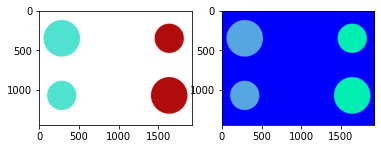

In [30]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

imagem = cv2.imread('img/circulo.png')
imagemRGB = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagemHSV = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

plt.subplot(1,2,1)
plt.imshow(imagemRGB)
plt.subplot(1,2,2)
plt.imshow(imagemHSV)
plt.show()

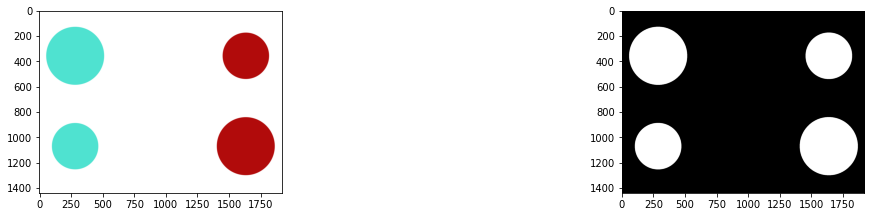

In [37]:

coraqua_baixo = np.array([86,64,88])
coraqua_alto = np.array([87,255,255])
maqua = cv2.inRange(imagemHSV, coraqua_baixo, coraqua_alto)

# cor vermelho para openCV
corvermelha_baixo = np.array([0,93,68])
corvermelha_alto = np.array([10,255,255])
mvermelha = cv2.inRange(imagemHSV, corvermelha_baixo, corvermelha_alto)

plt.figure(figsize = (20,20))
plt.subplot(1,4,2)
plt.imshow(imagemRGB)

#  cores para openCV
mask_min = np.array([0,64,68])
mask_max = np.array([87,255,255])
mask = cv2.inRange(imagemHSV, mask_min, mask_max)

plt.subplot(1,4,4)
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

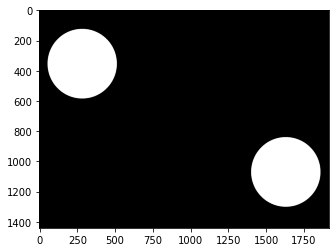

In [69]:
# segmentar apenas os circulos maiores 

altura = mask.shape[0]
largura = mask.shape[1]


mask_lg = mask.copy()
mask_lg[:int(altura/2),int(largura/2):] = black
mask_lg[int(altura/2):,:int(largura/2)] = black
black = maqua[:int(altura/2),int(largura/2):]

plt.imshow(mask_lg, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

centro de massa do circulo aquamarine na posição: 285x e 354y
centro de massa do circulo vermelho na posição: 1633x e 1069y


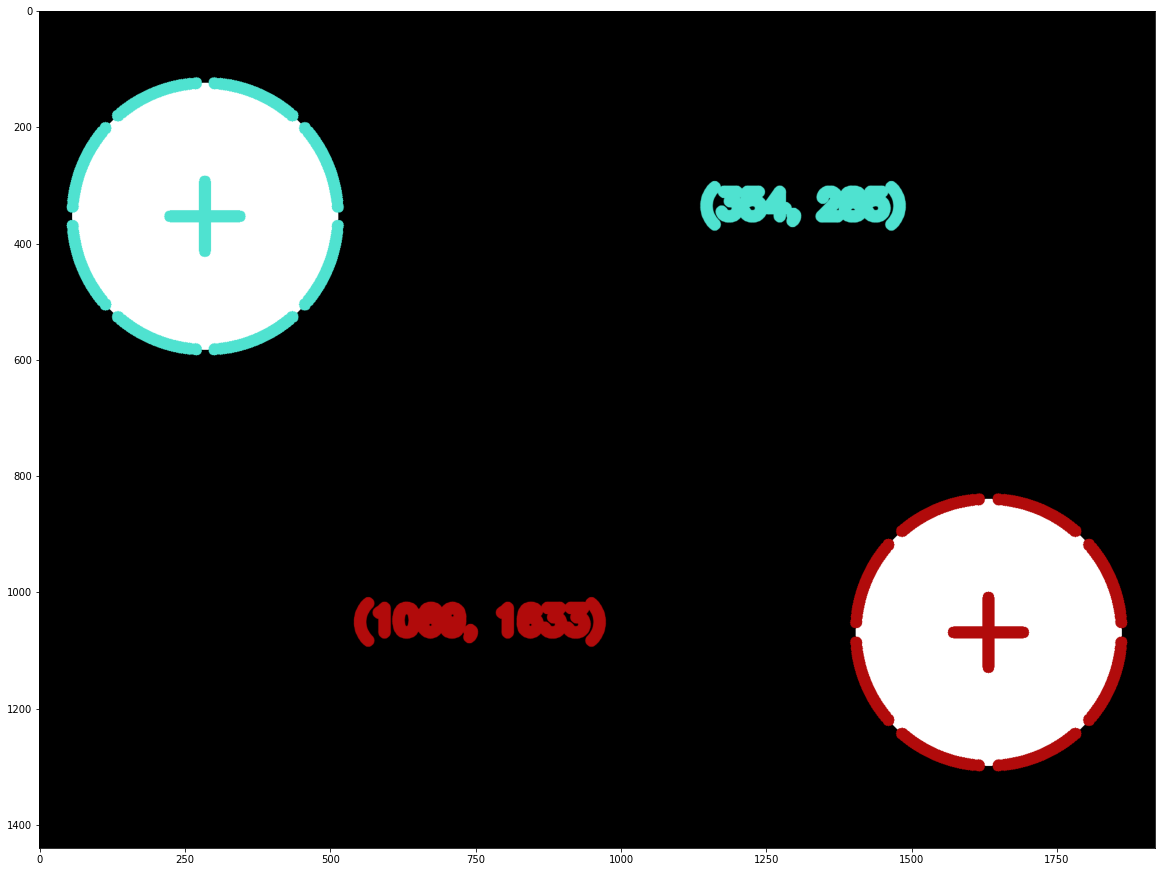

In [103]:
# criar contorno de elementos reconhecidos na mask

coraqua = (79,226,208)
corvermelha = (177,11,11)

circulos, _ = cv2.findContours(mask_lg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_lg_rgb = cv2.cvtColor(mask_lg, cv2.COLOR_GRAY2RGB) 
circulos_rgb = mask_lg_rgb.copy()
cv2.drawContours(circulos_rgb, circulos[1], -1, coraqua, 20);
cv2.drawContours(circulos_rgb, circulos[0], -1, corvermelha, 20);


# calcular cordendas do centro de massa
circulo_aqua = circulos[1]
momentos_aqua = cv2.moments(circulo_aqua)
ax = int(momentos_aqua['m10']/momentos_aqua['m00'])
ay = int(momentos_aqua['m01']/momentos_aqua['m00'])

circulo_vermelha = circulos[0]
momentos_vermelha = cv2.moments(circulo_vermelha)
vx = int(momentos_vermelha['m10']/momentos_vermelha['m00'])
vy = int(momentos_vermelha['m01']/momentos_vermelha['m00'])

print(f"centro de massa do circulo aquamarine na posição: {ax}x e {ay}y")
print(f"centro de massa do circulo vermelho na posição: {vx}x e {vy}y")

# printar centro de massa e valor na mascara
font = cv2.FONT_HERSHEY_SIMPLEX
size = 60

cv2.line(circulos_rgb,(ax - size,ay),(ax + size,ay),coraqua,20)
cv2.line(circulos_rgb,(ax,ay - size),(ax, ay + size),coraqua,20)

cv2.line(circulos_rgb,(vx - size,vy),(vx + size,vy),corvermelha,20)
cv2.line(circulos_rgb,(vx,vy - size),(vx, vy + size),corvermelha,20)

aqua = ay , ax
baqua = (ax*4,ay)

avermelha = vy , vx
bvermelha = (int(vx - vx/1.50),vy)

cv2.putText(circulos_rgb, str(aqua), baqua, font, 2, coraqua, 20, cv2.LINE_AA)
cv2.putText(circulos_rgb, str(avermelha), bvermelha, font,2, corvermelha, 20, cv2.LINE_AA)

plt.figure(figsize = (20,20))
plt.imshow(circulos_rgb);